In [26]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np

image_list = []

def my_load_Train_data() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/thermal train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/thermal test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

In [27]:
from PIL import Image

In [28]:
from keras.utils import np_utils
X_train = my_load_Train_data()
X_test = my_load_Test_data()
print(len(X_test))
y_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/y_labels.csv')
y_test = [[1],
           [1],
           [1],
           [0],
           [0],
           [0]]
n_classes = 2
X_train = np.array(X_train)
Y_train = np.array(y_train)
X_test = np.array(X_test)
Y_test = np.array(y_test)

Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)
len(X_train)
print(Y_test)
X_train.shape

6
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


(24, 32, 32, 3)

In [29]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

model = Sequential()

# convolutional layer
model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.10))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(2, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128,epochs=32,validation_data=(X_test, Y_test))

Epoch 1/32
1/1 [==============================] - 0s 402ms/step - loss: 0.7215 - accuracy: 0.5000 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 2/32
1/1 [==============================] - 0s 38ms/step - loss: 0.6977 - accuracy: 0.4167 - val_loss: 0.6811 - val_accuracy: 1.0000
Epoch 3/32
1/1 [==============================] - 0s 52ms/step - loss: 0.6962 - accuracy: 0.5833 - val_loss: 0.6760 - val_accuracy: 0.5000
Epoch 4/32
1/1 [==============================] - 0s 33ms/step - loss: 0.7636 - accuracy: 0.4583 - val_loss: 0.6725 - val_accuracy: 0.5000
Epoch 5/32
1/1 [==============================] - 0s 43ms/step - loss: 0.7014 - accuracy: 0.5833 - val_loss: 0.6753 - val_accuracy: 0.5000
Epoch 6/32
1/1 [==============================] - 0s 41ms/step - loss: 0.7036 - accuracy: 0.5417 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 7/32
1/1 [==============================] - 0s 39ms/step - loss: 0.7099 - accuracy: 0.4583 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 8/32
1/1 [==========

,y_labels
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


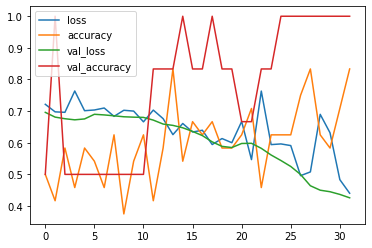

In [30]:
import pandas as pd

losses = pd.DataFrame(model.history.history)
losses.plot()

df = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/y_labels.csv')
df

In [31]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [19]:
# load the image
img = load_img('b4.jpg', target_size=(32, 32))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1,32, 32, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

FileNotFoundError: [Errno 2] No such file or directory: 'b4.jpg'

In [16]:
result = model.predict_classes(img)
print(result)

NameError: name 'img' is not defined